In [95]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split, RandomizedSearchCV, ShuffleSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, VotingClassifier, RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay


In [96]:
data = fetch_olivetti_faces(shuffle=True)

In [97]:
X = data.data
Y = data.target

print(X)

[[0.6694215  0.6363636  0.6487603  ... 0.08677686 0.08264463 0.07438017]
 [0.76859504 0.75619835 0.74380165 ... 0.48347107 0.6280992  0.6528926 ]
 [0.37190083 0.34710744 0.3677686  ... 0.7066116  0.6818182  0.5495868 ]
 ...
 [0.55785125 0.60330576 0.6570248  ... 0.17768595 0.20661157 0.19421488]
 [0.5206612  0.5206612  0.53305787 ... 0.46694216 0.43801653 0.43801653]
 [0.3966942  0.3677686  0.3429752  ... 0.37190083 0.26859504 0.29752067]]


In [98]:

print(Y)

[13 30 34 19 24  6 15 26 14 21  3 13 11 34  1  5 29 14 20 19 17 26 12 34
 17 31  7  1 28 10 17 30 33 22  6  7  9 17 17 39 10 32  0  0 29  5 37 25
 15 23 24 14 29 17 28 31  5  1  2  4  7 27  0 35 19 37 14  0 15 31  0 26
  6  2 10  1 36 30 36 32 33  6  5 10 30 22 12 37 39 32 38 25  5  0 19 14
 13 39 26 36 25  6 31 15 28 34  8 34 15 29  9  8 29  2 36 21 25  4 23 34
  9 22 23 23 37 14  2 25 35 16 15 39  6 24 21 10 31 19 32  1 16 18  3 11
 26 10 35 24 23 11 33 12 28 11 21 13 27 12 19 29 28 13  3 37 16  3 23  9
  8  6 16 28 20 39 23 28 10  4 32 39 22  7 13 38 22 21  2 18 36 27  5 32
 35  2  0 21 15 21 37 22 13 23 21 27 27 30 23  3 20 39  6  2 33  4 24 12
  9 11 16 38 38 34  4  1 28  7 24 39  7  1 36 21 38 38 22 16 10 16  8 18
 39 11 25 18 20 37 11 14 15 15  1 26  7 10 32 20 31 13 23 31 24 30  1 22
 30  0 27 12  7 18 30 37 34 18 35  8 25  1 29  8 26  3 38  5  4 27  5 20
 31 31 33 12 22  6 30 13 18  2  4  0 20 33  9 38 17 25  9 36  9 35 16  6
 30  4 20 27 22 14 14 18 13 35 39 26 32 20  8 12 34

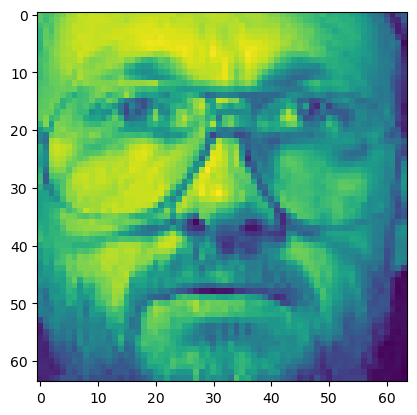

In [99]:
plt.imshow(data.images[0])

In [100]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precisão: {precision_score(y_test, y_pred, average='weighted', zero_division=0):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted', zero_division=0):.2f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted', zero_division=0):.2f}")
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))
    try:
        print(f"AUC-ROC: {roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'):.2f}")
    except:
        print("AUC-ROC não disponível para este modelo")


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=60)


In [102]:
voting_clf_hard = VotingClassifier(
 estimators=[
 ('GNB', GaussianNB()),
 ('svc', SVC()),
 ('rfc', RandomForestClassifier(random_state=60)),
 ('lr', LogisticRegression(random_state=60))
 ]
)

In [103]:
voting_clf_hard.fit(X_train, y_train)

C:\Users\marce\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('GNB', GaussianNB()), ('svc', SVC()),
                             ('rfc', RandomForestClassifier(random_state=60)),
                             ('lr', LogisticRegression(random_state=60))])

In [104]:
for name, clf in voting_clf_hard.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))
    
print(voting_clf_hard.score(X_test, y_test))

GNB = 0.86
svc = 0.91
rfc = 0.94
lr = 0.99
0.96


In [105]:
print(voting_clf_hard.predict([X_test[5]]))

print([clf.predict([X_test[5]]) for clf in voting_clf_hard.estimators_])

[14]
[array([14], dtype=int64), array([14], dtype=int64), array([14], dtype=int64), array([14], dtype=int64)]


In [106]:
print("Desempenho do VotingClassifier (hard):")
evaluate_model(voting_clf_hard, X_test, y_test)

Desempenho do VotingClassifier (hard):
Acurácia: 0.96
Precisão: 0.97
Revocação: 0.96
F1-Score: 0.96
Matriz de Confusão:
[[4 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]
AUC-ROC não disponível para este modelo


In [107]:
print("\nDesempenho dos Classificadores Individuais:")
for name, clf in voting_clf_hard.named_estimators_.items():
    print(f"\n{name}:")
    evaluate_model(clf, X_test, y_test)


Desempenho dos Classificadores Individuais:

GNB:
Acurácia: 0.86
Precisão: 0.94
Revocação: 0.86
F1-Score: 0.87
Matriz de Confusão:
[[3 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 1]]
AUC-ROC não disponível para este modelo

svc:
Acurácia: 0.91
Precisão: 0.94
Revocação: 0.91
F1-Score: 0.91
Matriz de Confusão:
[[3 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]
AUC-ROC não disponível para este modelo

rfc:
Acurácia: 0.94
Precisão: 0.95
Revocação: 0.94
F1-Score: 0.94
Matriz de Confusão:
[[3 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]
AUC-ROC não disponível para este modelo

lr:
Acurácia: 0.99
Precisão: 0.99
Revocação: 0.99
F1-Score: 0.99
Matriz de Confusão:
[[4 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]
AUC-ROC 

In [108]:
voting_clf_soft = VotingClassifier(
 estimators=[
 ('GNB', GaussianNB()),
 ('svc', SVC( probability=True)),
 ('rfc', RandomForestClassifier(random_state=60)),
 ('lr', LogisticRegression(random_state=60))
 ]
 ,voting='soft'
)

In [109]:
voting_clf_soft.fit(X_train, y_train)

C:\Users\marce\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('GNB', GaussianNB()),
                             ('svc', SVC(probability=True)),
                             ('rfc', RandomForestClassifier(random_state=60)),
                             ('lr', LogisticRegression(random_state=60))],
                 voting='soft')

In [110]:
for name, clf in voting_clf_soft.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))
    
print(voting_clf_soft.score(X_test, y_test))

GNB = 0.86
svc = 0.91
rfc = 0.94
lr = 0.99
0.87


In [111]:
print(voting_clf_soft.predict([X_test[9]]))

print([clf.predict([X_test[9]]) for clf in voting_clf.estimators_])

[23]
[array([23], dtype=int64), array([23], dtype=int64), array([23], dtype=int64), array([23], dtype=int64)]


In [112]:
print("Desempenho do VotingClassifier (soft):")
evaluate_model(voting_clf_soft, X_test, y_test)

Desempenho do VotingClassifier (soft):
Acurácia: 0.87
Precisão: 0.95
Revocação: 0.87
F1-Score: 0.88
Matriz de Confusão:
[[3 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]
AUC-ROC não disponível para este modelo


In [113]:
print("\nDesempenho dos Classificadores Individuais:")
for name, clf in voting_clf_soft.named_estimators_.items():
    print(f"\n{name}:")
    evaluate_model(clf, X_test, y_test)


Desempenho dos Classificadores Individuais:

GNB:
Acurácia: 0.86
Precisão: 0.94
Revocação: 0.86
F1-Score: 0.87
Matriz de Confusão:
[[3 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 1]]
AUC-ROC não disponível para este modelo

svc:
Acurácia: 0.91
Precisão: 0.94
Revocação: 0.91
F1-Score: 0.91
Matriz de Confusão:
[[3 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]
AUC-ROC não disponível para este modelo

rfc:
Acurácia: 0.94
Precisão: 0.95
Revocação: 0.94
F1-Score: 0.94
Matriz de Confusão:
[[3 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]
AUC-ROC não disponível para este modelo

lr:
Acurácia: 0.99
Precisão: 0.99
Revocação: 0.99
F1-Score: 0.99
Matriz de Confusão:
[[4 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]
AUC-ROC 